In [2]:
!pip install librosa


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import librosa 
import os
from IPython.display import Audio,display as ipd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [7]:
hfc="HFC"
lfc="LFC"
hfc_path=os.listdir(hfc)
lfc_path=os.listdir(lfc)

In [8]:
def scales(folder,files):
    scales=[]
    srs=[]

    for audio in files:
        scale,sr=librosa.load(f"{folder}/{audio}")
        scales.append(scale)
        srs.append(sr)
    return scales,sr
hfc_scales,hfc_srs=scales(hfc,hfc_path)
lfc_scales,lfc_srs=scales(lfc,lfc_path)

In [11]:
for i in range(0,15):
    print(hfc_scales[i])
for i in range(0,15):
    print(lfc_scales[i])


[-0.04736466 -0.07393556 -0.06413887 ...  0.03493602  0.05019087
  0.05474514]
[ 0.01606259  0.01608433  0.00022279 ... -0.19875118 -0.18518168
 -0.17355417]
[0.01789049 0.02798295 0.02384971 ... 0.06944572 0.06613637 0.        ]
[ 0.03385639  0.05104592  0.04094809 ... -0.18115138 -0.22485642
 -0.16431203]
[0.12271892 0.18983734 0.16820762 ... 0.16743919 0.19775233 0.        ]
[0.01722281 0.03834297 0.04742962 ... 0.42519176 0.38327023 0.28521773]
[-0.03129256 -0.04278779 -0.0286648  ... -0.03433502 -0.02930512
 -0.02019322]
[ 0.07112933  0.10423952  0.08174483 ... -0.07263148 -0.06063379
  0.        ]
[-0.05129905 -0.09765735 -0.10667932 ... -0.03672463 -0.05219493
  0.        ]
[ 3.6972016e-01  6.0104799e-01  5.5990845e-01 ...  3.1493966e-02
 -3.9711734e-04 -3.5953559e-02]
[ 0.08970813  0.13606465  0.11714663 ... -0.06304925 -0.05653803
 -0.03282864]
[ 0.04329161  0.08137547  0.09197281 ... -0.16924763 -0.16129406
  0.        ]
[ 0.00228959 -0.00087034 -0.00706985 ...  0.08421505  0

In [13]:
def auggumentation(folder,files):
    audio_filename = os.path.splitext(os.path.basename(audio))[0]
    augmented_audio_filename = f"{audio_filename}_augmented_speed.wav"
    
    #speed
    y_speed = scale.copy()
    speed_change = np.random.uniform(low=0.9,high=1.1)
    tmp = librosa.effects.time_stretch(y_speed.astype('float64'),rate= speed_change)
    minlen = min(y_speed.shape[0], tmp.shape[0])
    y_speed *= 0 
    y_speed[0:minlen] = tmp[0:minlen]
    augmented_audio_path = os.path.join(folder, augmented_audio_filename)
    write(augmented_audio_path, sr, y_speed)
    
    #value aggumentation
    y_aug = scale.copy()
    dyn_change = np.random.uniform(low=1.5,high=3)
    y_aug = y_aug * dyn_change
    augmented_audio_path = os.path.join(folder, augmented_audio_filename)
    write(augmented_audio_path, sr, y_aug)
    
    #adding distrubuted noise
    y_noise = scale.copy()
    noise_amp = 0.005*np.random.uniform()*np.amax(y_noise)
    y_noise = y_noise.astype('float64') + noise_amp * np.random.normal(size=y_noise.shape[0])
    augmented_audio_path = os.path.join(folder, augmented_audio_filename)
    write(augmented_audio_path, sr, y_noise)
    
    #random shifting
    y_shift = scale.copy()
    timeshift_fac = 0.2 *2*(np.random.uniform()-0.5)  # up to 20% of length
    start = int(y_shift.shape[0] * timeshift_fac)
    if (start > 0):
        y_shift = np.pad(y_shift,(start,0),mode='constant')[0:y_shift.shape[0]]
    else:
        y_shift = np.pad(y_shift,(0,-start),mode='constant')[0:y_shift.shape[0]]
    augmented_audio_path = os.path.join(folder, augmented_audio_filename)
    write(augmented_audio_path, sr, y_shift)
        
    #hpss
    y_hpss = librosa.effects.hpss(samples.astype('float64'))
    augmented_audio_path = os.path.join(folder, augmented_audio_filename)
    write(augmented_audio_path, sr, y_hpss)
    
    #stretching
    input_length = len(scale)
    streching = scale.copy()
    streching = librosa.effects.time_stretch(streching.astype('float'), rate=1.1)
    if len(streching) > input_length:
        streching = streching[:input_length]
    else:
        streching = np.pad(streching, (0, max(0, input_length - len(streching))), "constant")
    
    augmented_audio_path = os.path.join(folder, augmented_audio_filename)
    write(augmented_audio_path, sr, streching)
    
#aggumentatio(lfc,lfc_path)



In [21]:
def scale_melspec(mel_specs):
    target_size = (224, 224)  # Target size for mel spectrograms

    scaled_mel_spectrograms = []
    for mel_spec in mel_specs:
        # Scale mel spectrogram using PIL
        scaled_mel_spec = librosa.util.normalize(mel_spec)  # Normalize mel spectrogram
        scaled_mel_spec = (scaled_mel_spec * 255).astype(np.uint8)  # Convert to uint8
        scaled_mel_spec = Image.fromarray(scaled_mel_spec)  # Convert to PIL image
        scaled_mel_spec = scaled_mel_spec.resize(target_size, Image.ANTIALIAS)  # Resize
        scaled_mel_spec = np.array(scaled_mel_spec)
        scaled_mel_spectrograms.append(scaled_mel_spec)

    return scaled_mel_spectrograms

In [22]:
def log_mel_gen(folder,file):
    scales=[]
    srs=[]
    for audio in file:
        f=f"{folder}/{audio}"
        if f.endswith(".wav"):
            scale,sr=librosa.load(f"{folder}/{audio}")
            scales.append(scale)
            srs.append(sr)
    
    mel_specs=[]
    for scale,sr in zip(scales,srs):
        mel_spec=librosa.feature.melspectrogram(y=scale,sr=sr,n_fft=2048,hop_length=512,n_mels=128)
        
        mel_specs.append(mel_spec)
    mel_specs=scale_melspec(mel_specs)

    log_mel_spectrograms = []
    for mel_spec in mel_specs:
        log_mel_spectrogram = librosa.power_to_db(mel_spec)
        log_mel_spectrograms.append(log_mel_spectrogram)
    return log_mel_spectrograms

In [25]:
hfc_mel_specs=log_mel_gen(hfc,hfc_path)
lfc_mel_specs=log_mel_gen(lfc,lfc_path)
print(hfc_mel_specs)
print(lfc_mel_specs)

C:\Users\pbach\AppData\Local\Temp\ipykernel_10680\3715177837.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  scaled_mel_spec = scaled_mel_spec.resize(target_size, Image.ANTIALIAS)  # Resize


[array([[  3.01029996,   3.01029996,   3.01029996, ...,   0.        ,
          0.        ,   0.        ],
       [  3.01029996,   3.01029996,   3.01029996, ...,   0.        ,
          0.        ,   0.        ],
       [  3.01029996,   3.01029996,   3.01029996, ..., -55.9345982 ,
        -55.9345982 , -55.9345982 ],
       ...,
       [-55.9345982 , -55.9345982 , -55.9345982 , ..., -55.9345982 ,
        -55.9345982 , -55.9345982 ],
       [-55.9345982 , -55.9345982 , -55.9345982 , ..., -55.9345982 ,
        -55.9345982 , -55.9345982 ],
       [-55.9345982 , -55.9345982 , -55.9345982 , ..., -55.9345982 ,
        -55.9345982 , -55.9345982 ]]), array([[-55.9345982 , -55.9345982 , -55.9345982 , ..., -55.9345982 ,
        -55.9345982 , -55.9345982 ],
       [  0.        ,   0.        ,   0.        , ..., -55.9345982 ,
        -55.9345982 , -55.9345982 ],
       [ 11.76091259,  12.04119983,  12.78753601, ..., -55.9345982 ,
        -55.9345982 , -55.9345982 ],
       ...,
       [-55.9345982

[array([[ 10.        ,  10.        ,   9.54242509, ..., -55.9345982 ,
        -55.9345982 , -55.9345982 ],
       [ 14.91361694,  14.47158031,  14.14973348, ..., -55.9345982 ,
        -55.9345982 , -55.9345982 ],
       [ 19.91226076,  19.68482949,  19.39519253, ...,   0.        ,
        -55.9345982 , -55.9345982 ],
       ...,
       [-55.9345982 , -55.9345982 , -55.9345982 , ..., -55.9345982 ,
        -55.9345982 , -55.9345982 ],
       [-55.9345982 , -55.9345982 , -55.9345982 , ..., -55.9345982 ,
        -55.9345982 , -55.9345982 ],
       [-55.9345982 , -55.9345982 , -55.9345982 , ..., -55.9345982 ,
        -55.9345982 , -55.9345982 ]]), array([[ 11.76091259,  11.46128036,  11.46128036, ..., -55.9345982 ,
          0.        ,   0.        ],
       [ 16.02059991,  15.79783597,  15.44068044, ..., -55.9345982 ,
          0.        ,   0.        ],
       [ 20.49218023,  20.33423755,  20.12837225, ..., -55.9345982 ,
          3.01029996,   4.77121255],
       ...,
       [-55.9345982

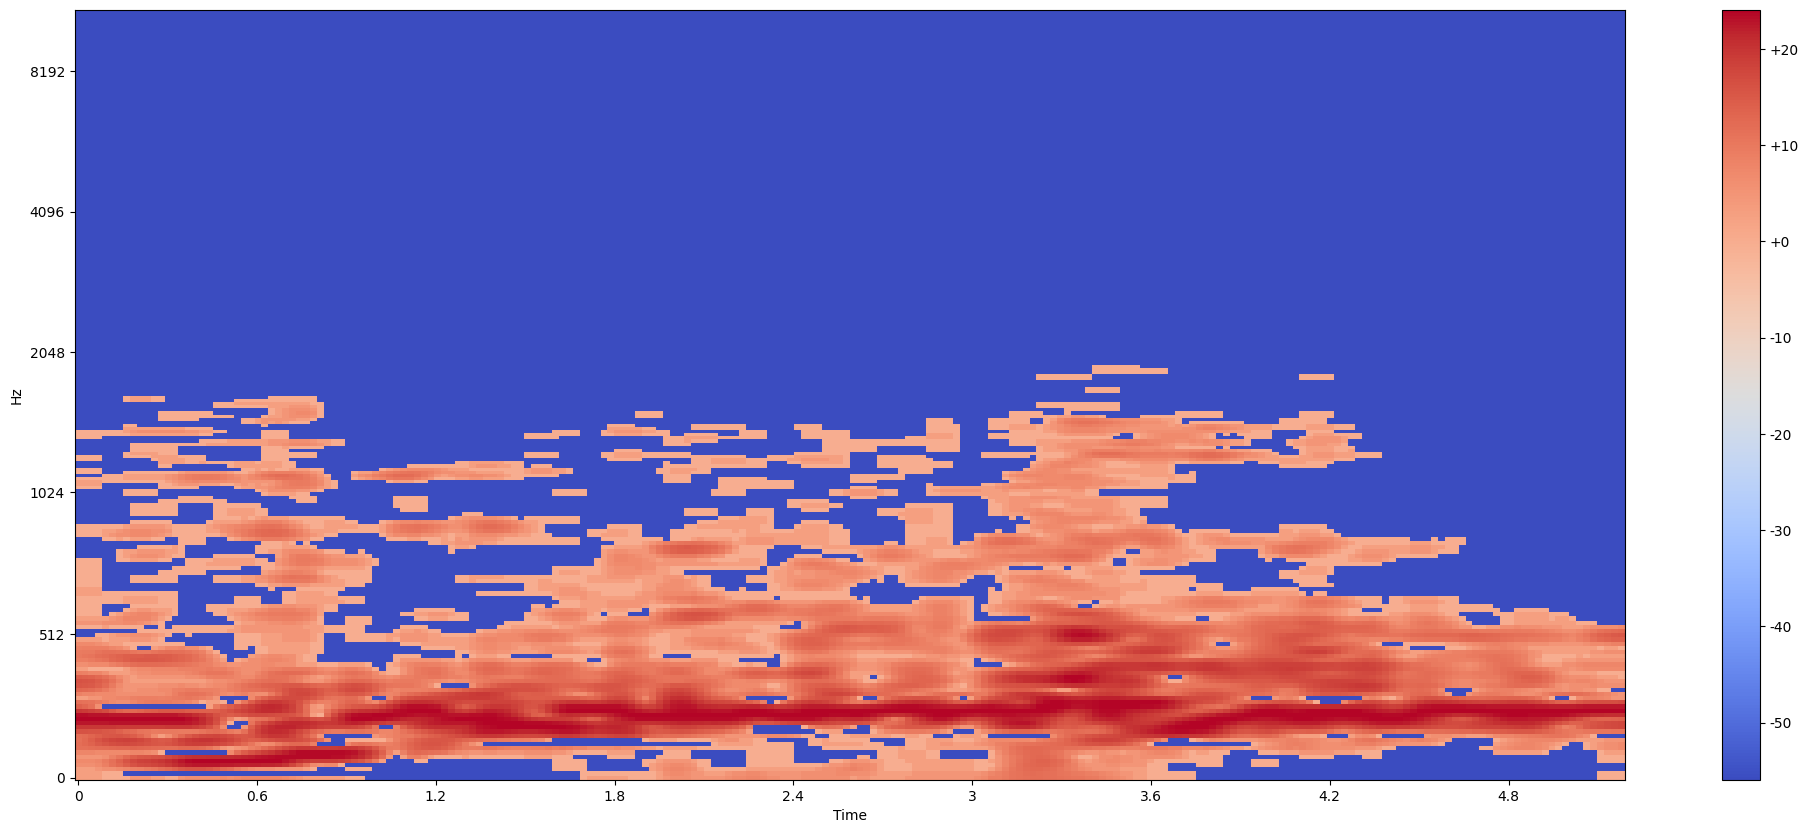

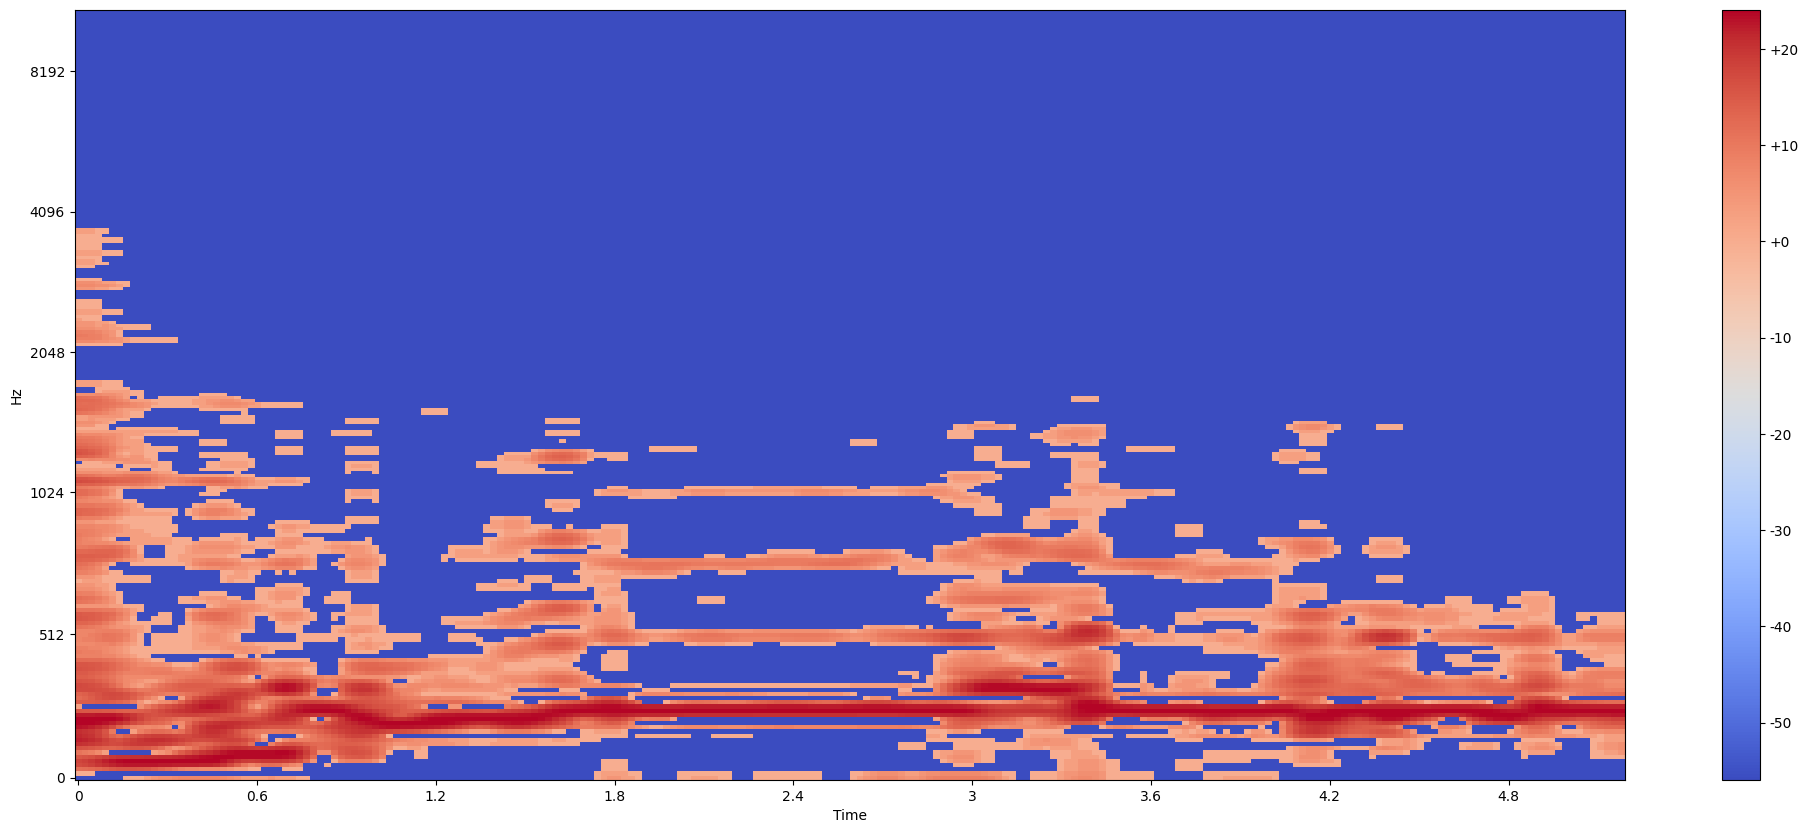

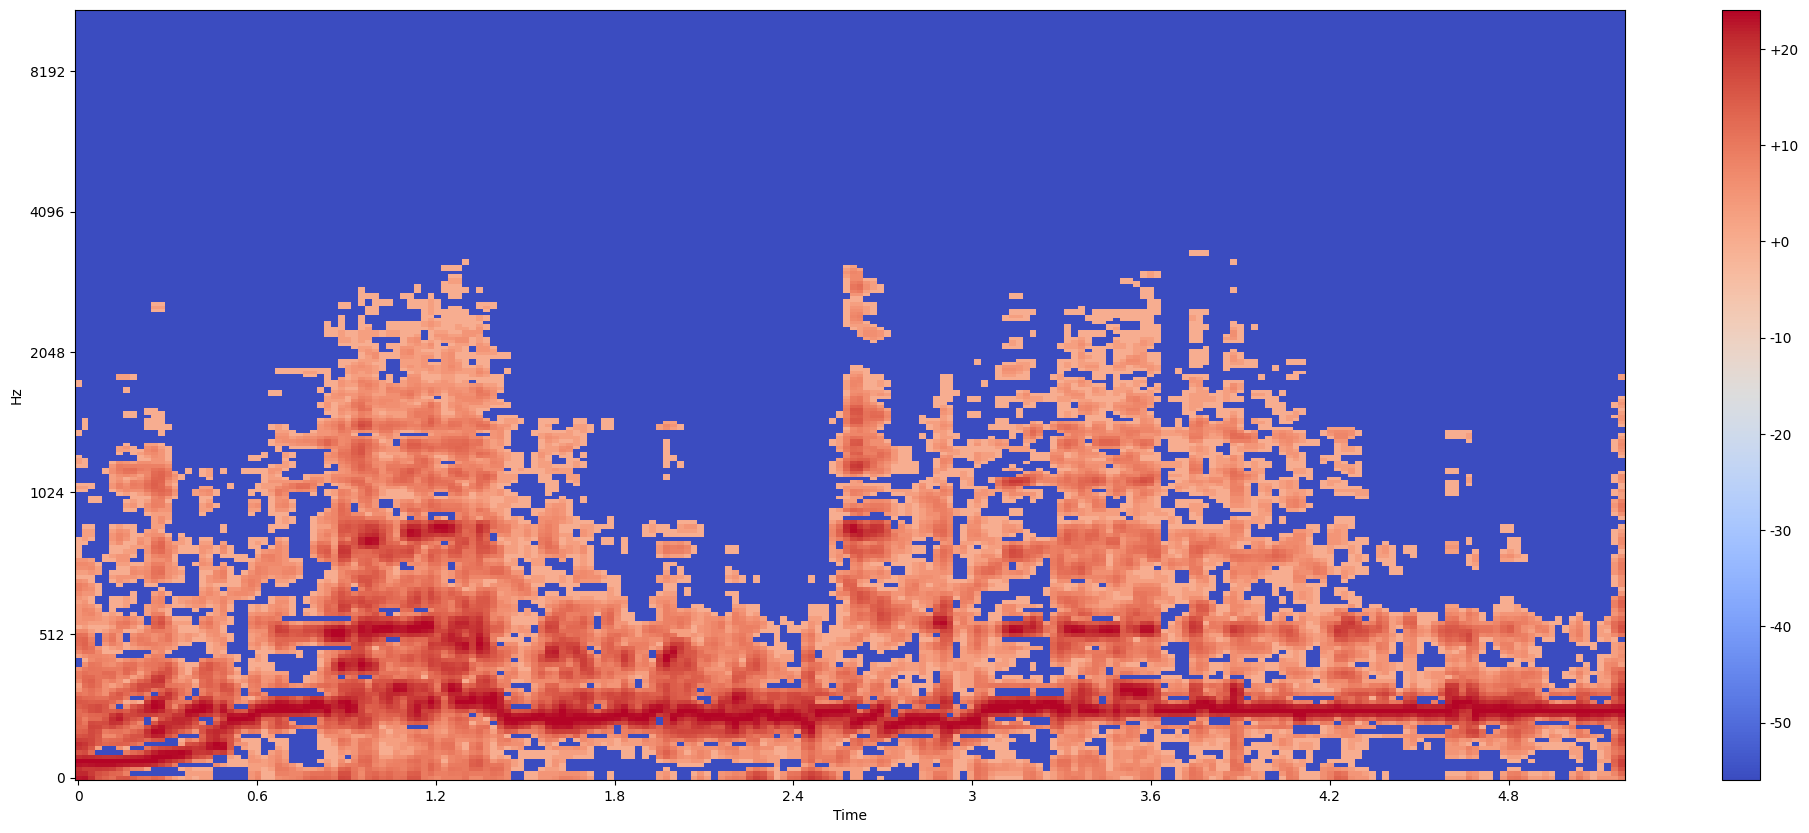

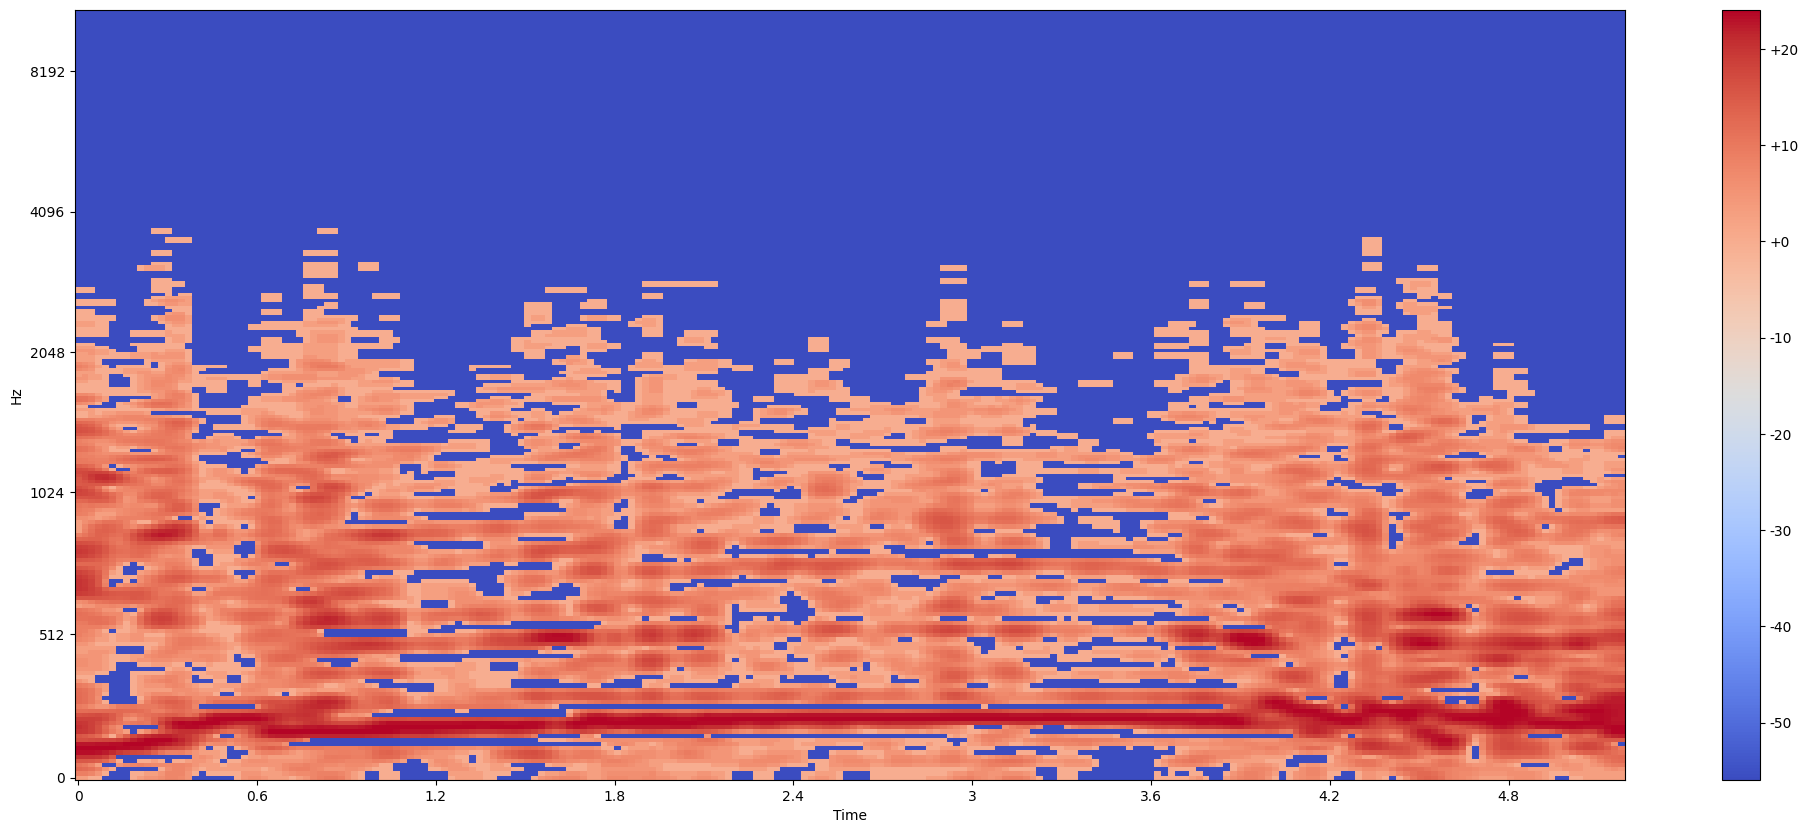

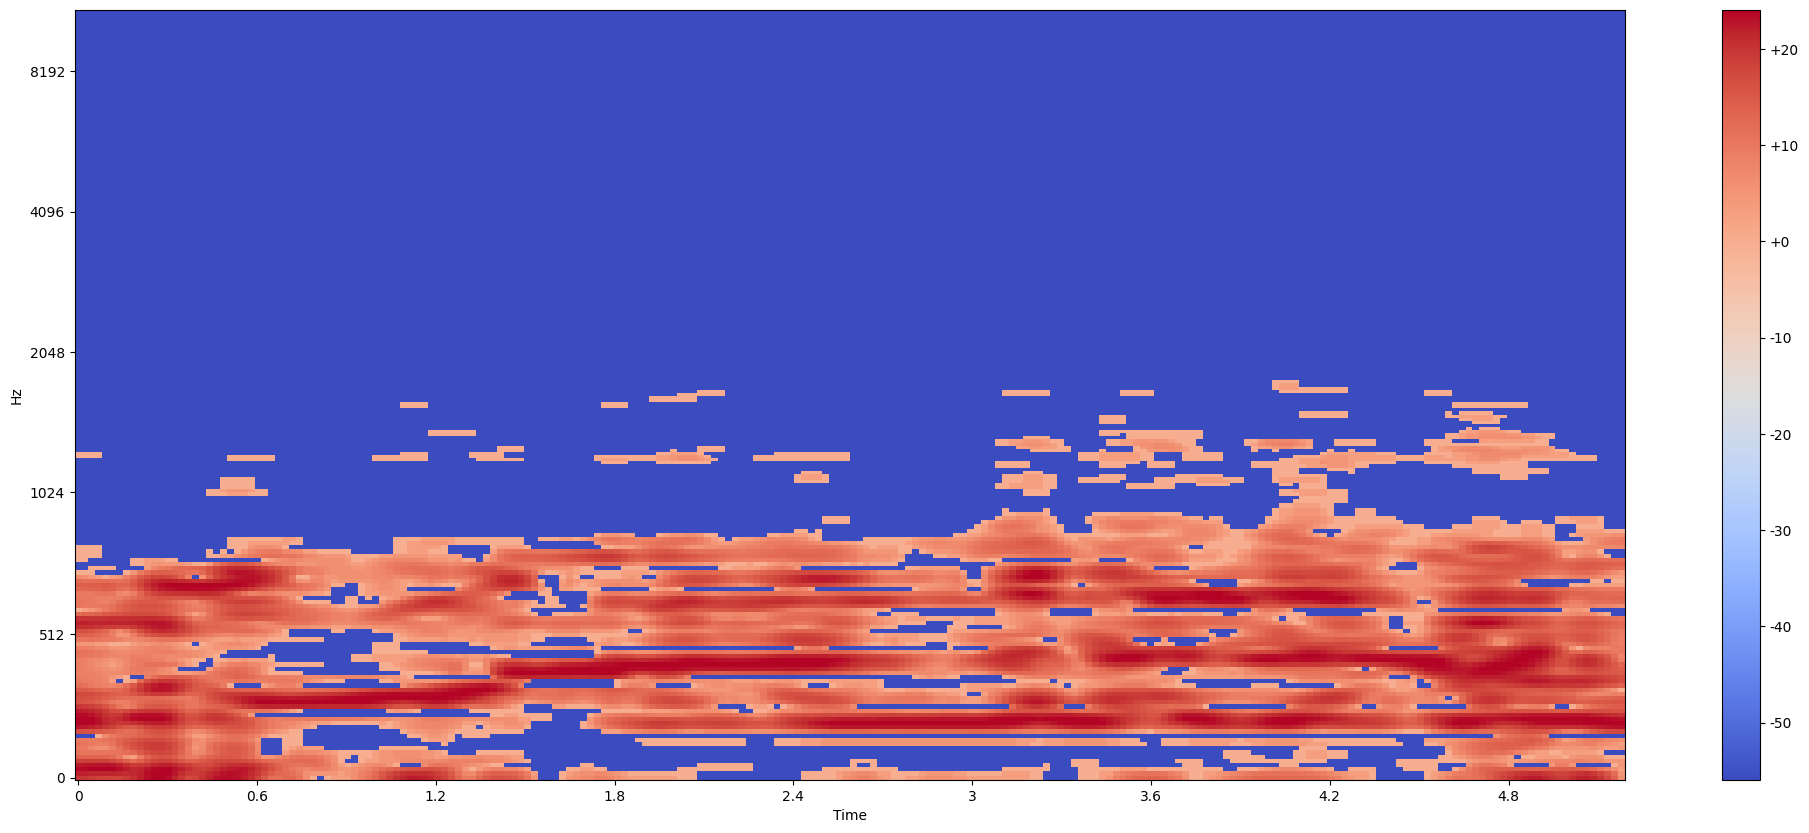

In [26]:
for i in range(0,5):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(hfc_mel_specs[i],x_axis="time",y_axis="mel",sr=22050)
    plt.colorbar(format="%+2.f")
    plt.show()

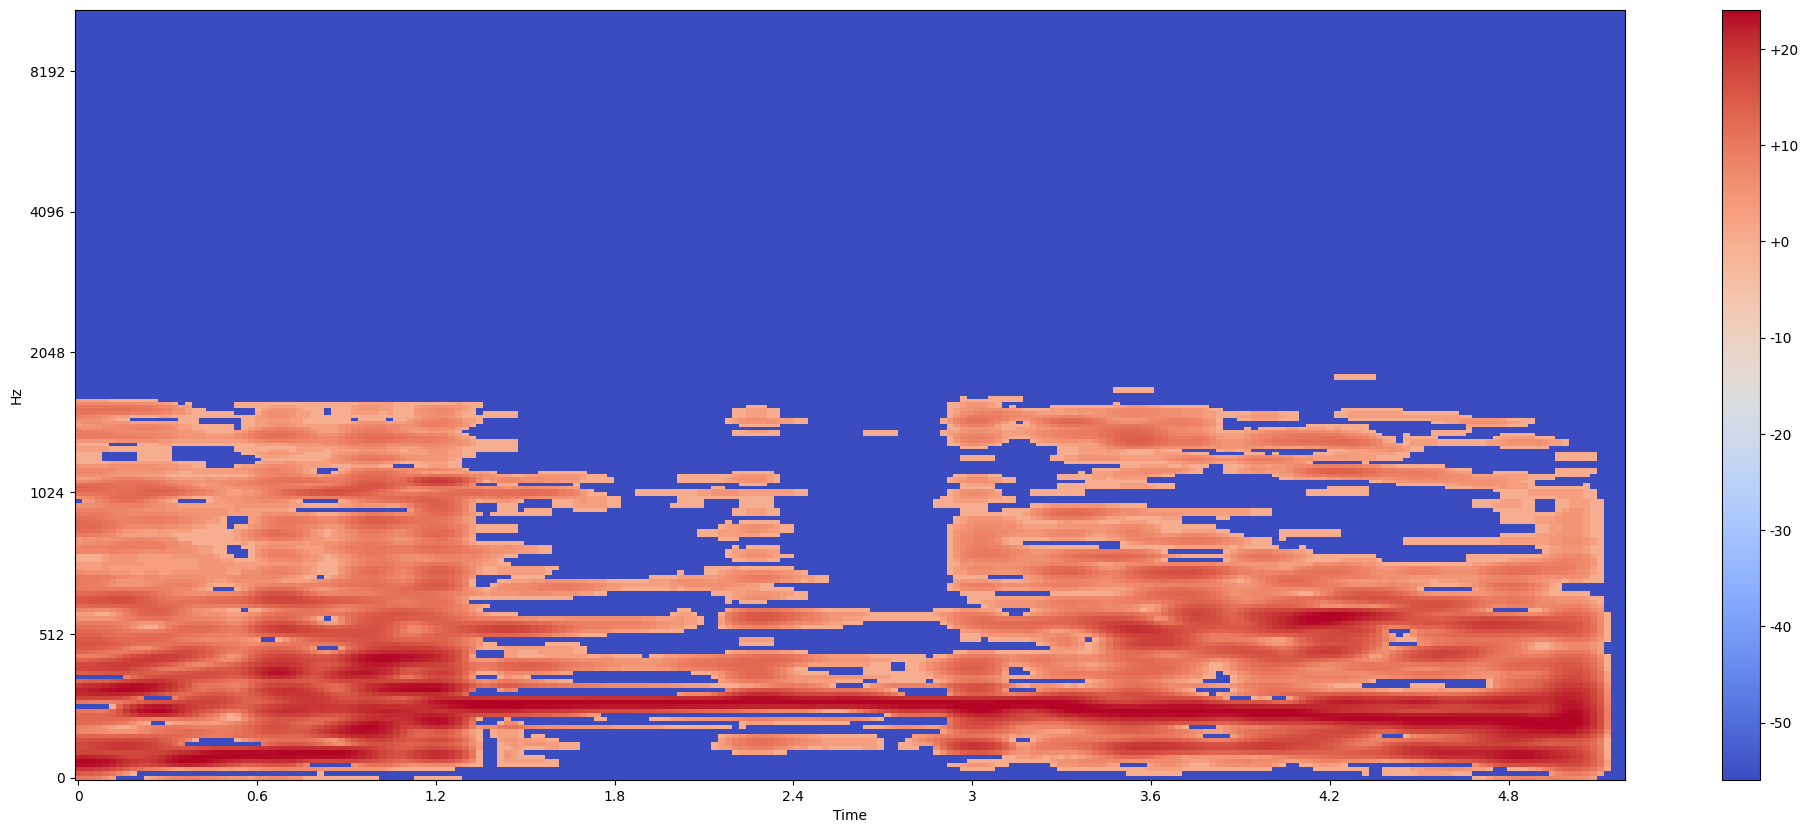

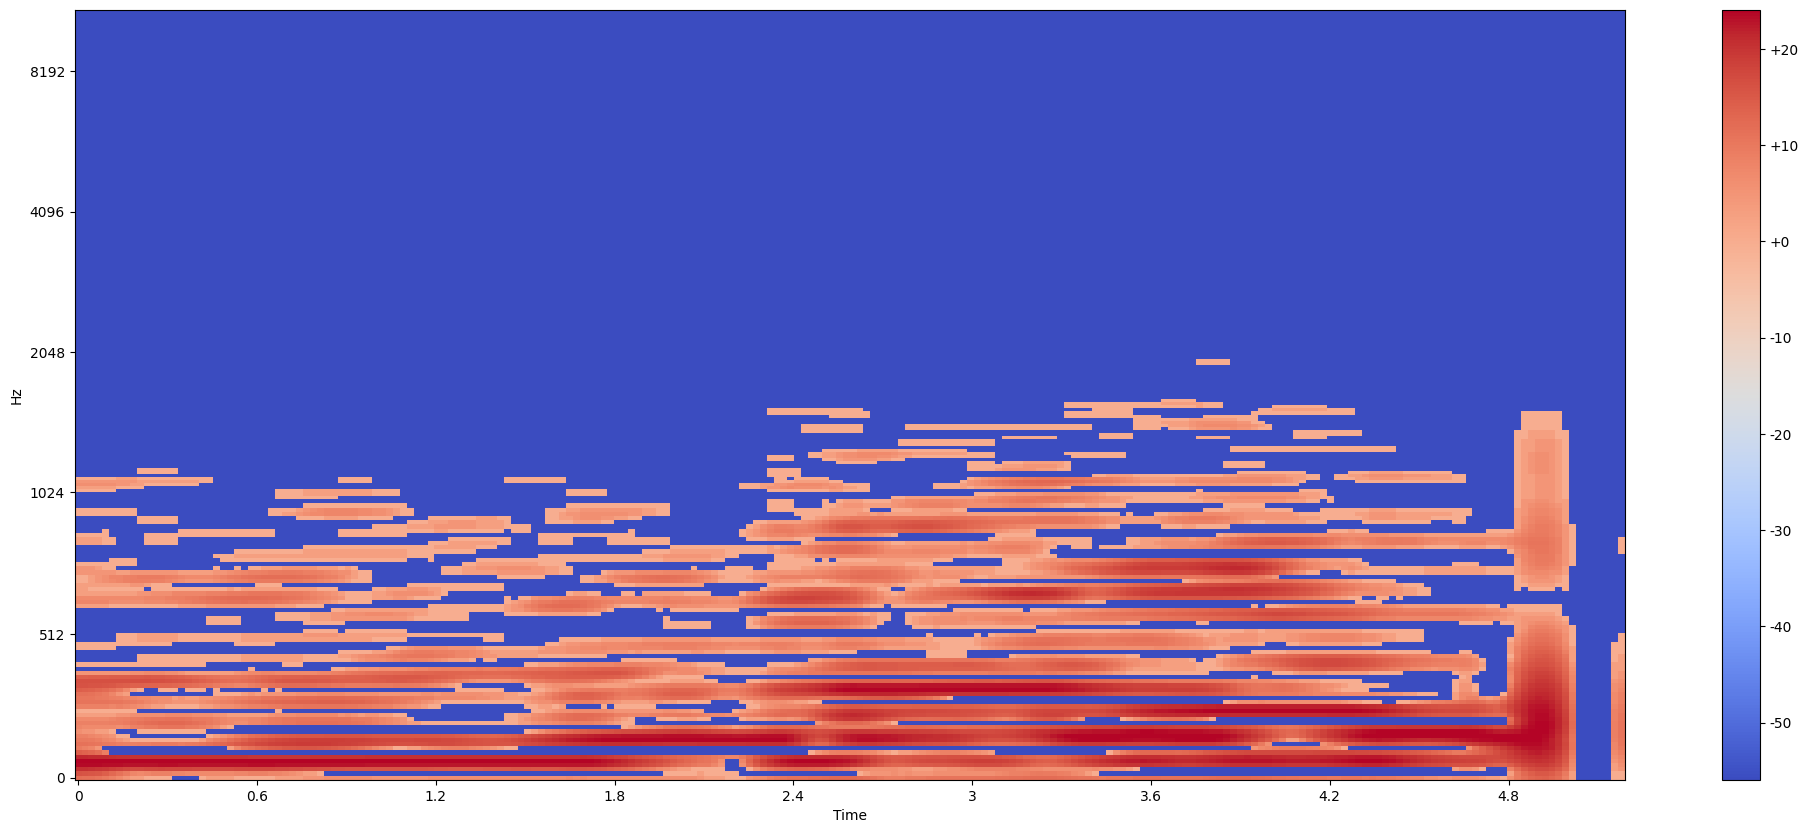

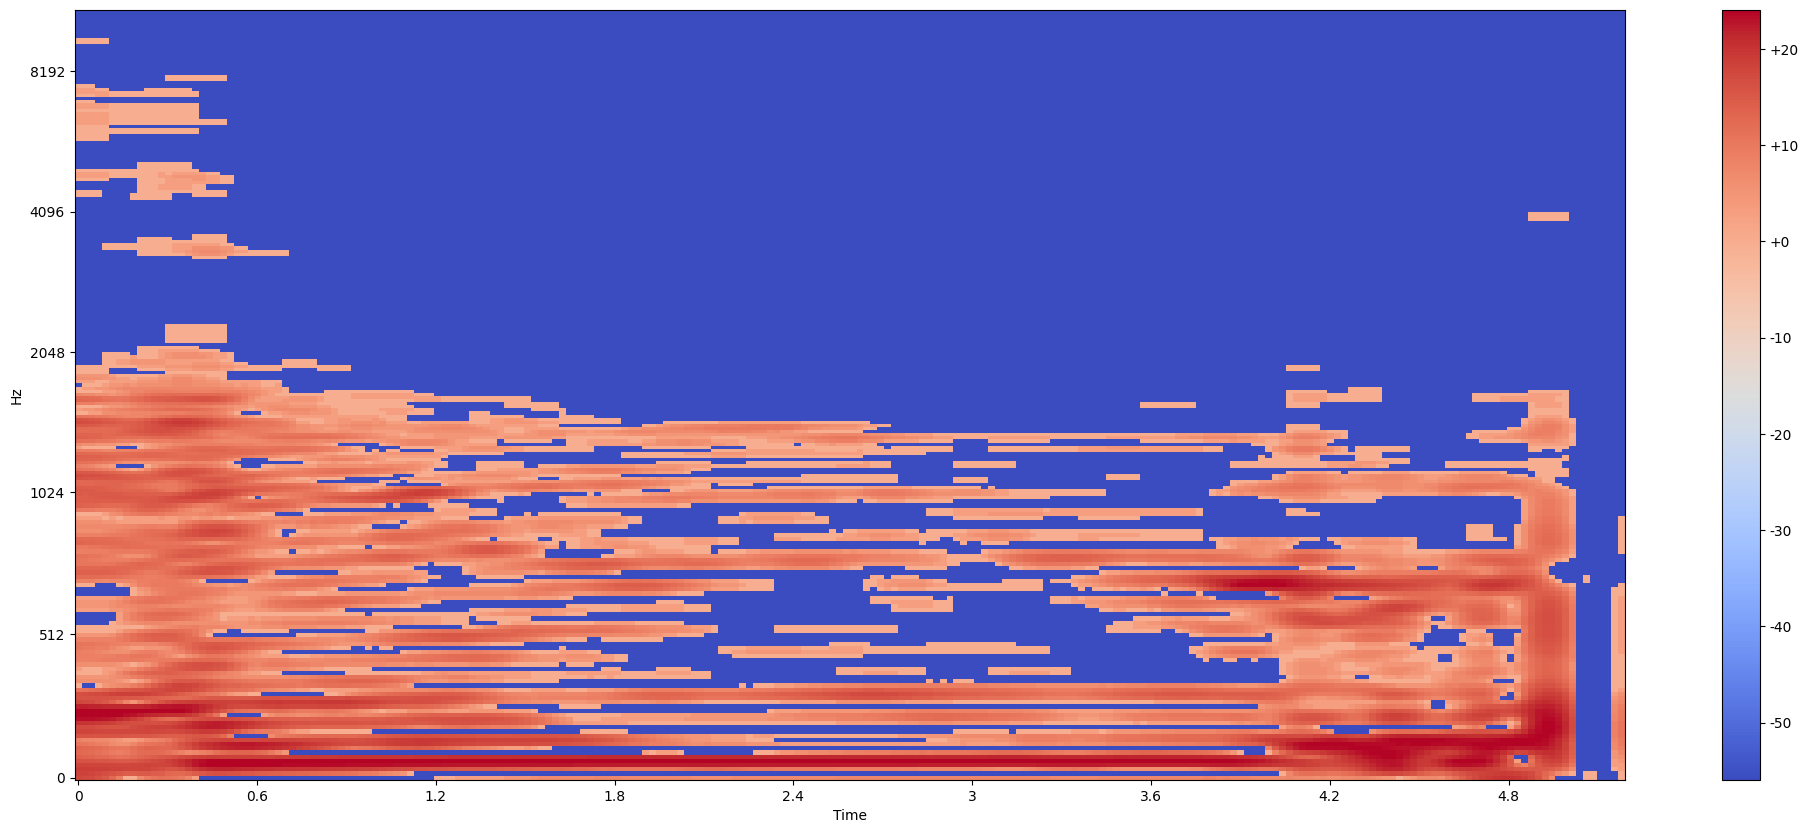

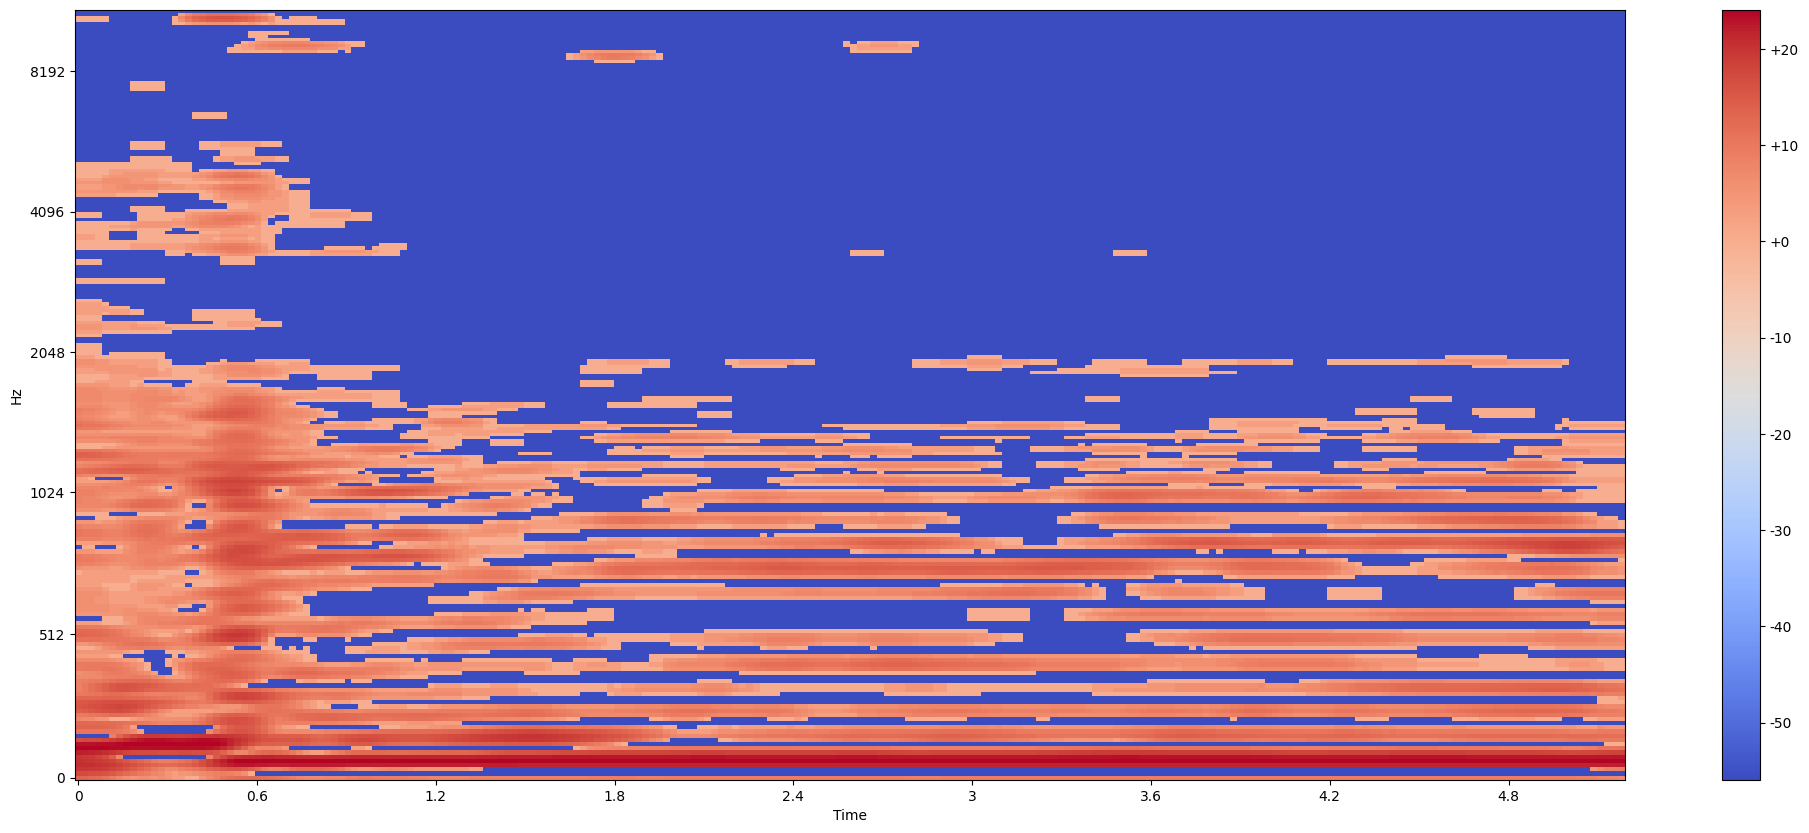

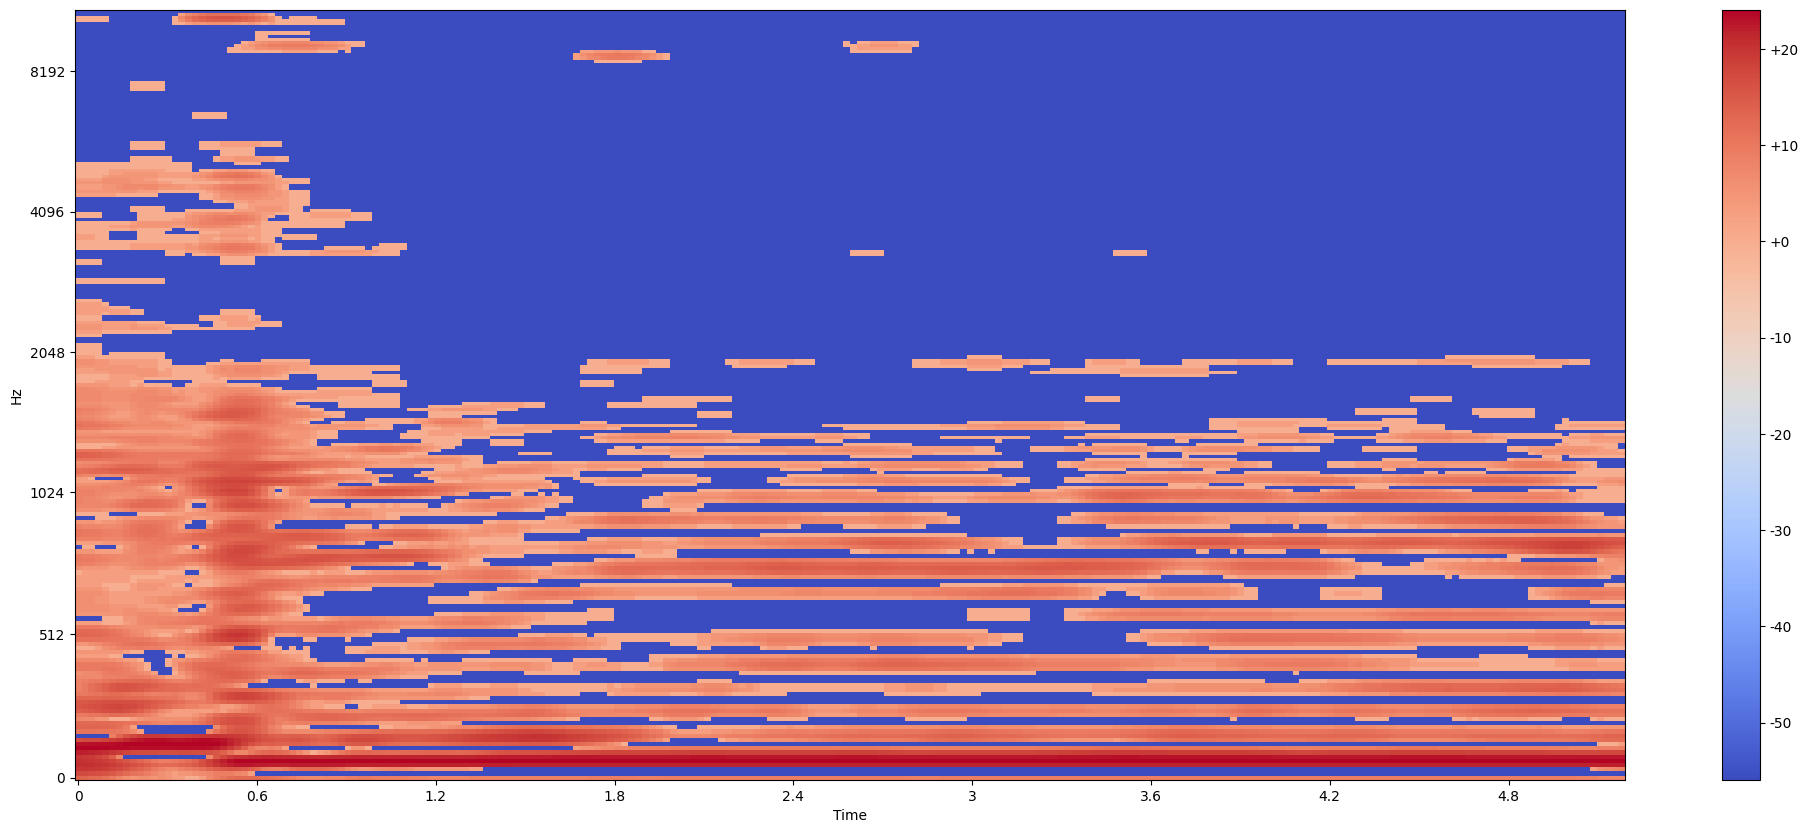

In [27]:
for i in range(0,5):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(lfc_mel_specs[i],x_axis="time",y_axis="mel",sr=22050)
    plt.colorbar(format="%+2.f")
    plt.show()

In [28]:
np.array(hfc_mel_specs)
np.array(lfc_mel_specs)

array([[[ 10.        ,  10.        ,   9.54242509, ..., -55.9345982 ,
         -55.9345982 , -55.9345982 ],
        [ 14.91361694,  14.47158031,  14.14973348, ..., -55.9345982 ,
         -55.9345982 , -55.9345982 ],
        [ 19.91226076,  19.68482949,  19.39519253, ...,   0.        ,
         -55.9345982 , -55.9345982 ],
        ...,
        [-55.9345982 , -55.9345982 , -55.9345982 , ..., -55.9345982 ,
         -55.9345982 , -55.9345982 ],
        [-55.9345982 , -55.9345982 , -55.9345982 , ..., -55.9345982 ,
         -55.9345982 , -55.9345982 ],
        [-55.9345982 , -55.9345982 , -55.9345982 , ..., -55.9345982 ,
         -55.9345982 , -55.9345982 ]],

       [[ 11.76091259,  11.46128036,  11.46128036, ..., -55.9345982 ,
           0.        ,   0.        ],
        [ 16.02059991,  15.79783597,  15.44068044, ..., -55.9345982 ,
           0.        ,   0.        ],
        [ 20.49218023,  20.33423755,  20.12837225, ..., -55.9345982 ,
           3.01029996,   4.77121255],
        ...,


In [29]:
np.save('hfc_log_melspecs.txt', hfc_mel_specs)
np.save('lfc_unhealthy_log_melspecs.txt', lfc_mel_specs)
